In [347]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

# Data Exploration

In [348]:
pd.read_csv('../data/nfl_teams.csv')

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [349]:
# Opening up the data
df = pd.read_csv('../data/spreadspoke_scores.csv')

In [350]:
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


In [351]:
pd.read_csv('../data/nfl_stadiums.csv', encoding='unicode_escape')

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


# Data Cleaning 

Only wanted to focus on the years above 1975 when they introduced spread. Got rid of the superbowl and where the game was 50/50.

In [352]:
# Remvoved some data
df = df.loc[(df['schedule_season'] >= 1985) & (df['schedule_week'] != 'Superbowl')]
df = df.loc[df['team_favorite_id'] != 'PICK']
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
3807,9/8/1985,1985,1,False,Atlanta Falcons,27.0,28.0,Detroit Lions,ATL,-3.0,41.5,Atlanta-Fulton County Stadium,False,79.0,7.0,67.0,NaN
3808,9/8/1985,1985,1,False,Buffalo Bills,9.0,14.0,San Diego Chargers,LAC,-5.0,46,Ralph Wilson Stadium,False,76.0,11.0,83.0,NaN
3809,9/8/1985,1985,1,False,Chicago Bears,38.0,28.0,Tampa Bay Buccaneers,CHI,-7.5,39,Soldier Field,False,81.0,10.0,79.0,NaN
3810,9/8/1985,1985,1,False,Cincinnati Bengals,24.0,28.0,Seattle Seahawks,SEA,-3.0,41,Cinergy Field,False,79.0,8.0,71.0,NaN
3811,9/8/1985,1985,1,False,Cleveland Browns,24.0,27.0,St. Louis Cardinals,ARI,-2.5,40.5,Cleveland Municipal Stadium,False,77.0,10.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN


Created a list of the home teams, because some teams had more than one name. Which we converted them to abbreviations so it can be just one team name. 

In [353]:
home_teams = list(df['team_home'].values)
home_teams

['Atlanta Falcons',
 'Buffalo Bills',
 'Chicago Bears',
 'Cincinnati Bengals',
 'Cleveland Browns',
 'Houston Oilers',
 'Los Angeles Raiders',
 'Minnesota Vikings',
 'New England Patriots',
 'New York Giants',
 'Pittsburgh Steelers',
 'Dallas Cowboys',
 'Kansas City Chiefs',
 'Chicago Bears',
 'Denver Broncos',
 'Detroit Lions',
 'Miami Dolphins',
 'New York Jets',
 'Philadelphia Eagles',
 'San Diego Chargers',
 'San Francisco 49ers',
 'St. Louis Cardinals',
 'Tampa Bay Buccaneers',
 'Washington Redskins',
 'Cleveland Browns',
 'Minnesota Vikings',
 'Atlanta Falcons',
 'Buffalo Bills',
 'Cincinnati Bengals',
 'Dallas Cowboys',
 'Green Bay Packers',
 'Indianapolis Colts',
 'Los Angeles Raiders',
 'Miami Dolphins',
 'New Orleans Saints',
 'New York Giants',
 'Pittsburgh Steelers',
 'Washington Redskins',
 'Seattle Seahawks',
 'Buffalo Bills',
 'Chicago Bears',
 'Denver Broncos',
 'Detroit Lions',
 'Houston Oilers',
 'Kansas City Chiefs',
 'Los Angeles Rams',
 'New England Patriots',
 'Ne

In [354]:
# Change team names to abbreviations 
home_team_ab = []
for team in home_teams:
    if team.__contains__('Cardinals'):
        home_team_ab.append('ARI')
    elif team.__contains__('Falcons'):
        home_team_ab.append('ATL')
    elif team.__contains__('Ravens'):
        home_team_ab.append('BAL')
    elif team.__contains__('Bills'):
        home_team_ab.append('BUF')
    elif team.__contains__('Panthers'):
        home_team_ab.append('CAR')
    elif team.__contains__('Bears'):
        home_team_ab.append('CHI')
    elif team.__contains__('Bengals'):
        home_team_ab.append('CIN')
    elif team.__contains__('Browns'):
        home_team_ab.append('CLE')
    elif team.__contains__('Cowboys'):
        home_team_ab.append('DAL')
    elif team.__contains__('Broncos'):
        home_team_ab.append('DEN')
    elif team.__contains__('Lions'):
        home_team_ab.append('DET')
    elif team.__contains__('Packers'):
        home_team_ab.append('GB')
    elif team.__contains__('Texans'):
        home_team_ab.append('HOU')
    elif team.__contains__('Colts'):
        home_team_ab.append('IND')
    elif team.__contains__('Jaguars'):
        home_team_ab.append('JAX')
    elif team.__contains__('Chiefs'):
        home_team_ab.append('KC')
    elif team.__contains__('Chargers'):
        home_team_ab.append('LAC')
    elif team.__contains__('Rams'):
        home_team_ab.append('LAR')
    elif team.__contains__('Dolphins'):
        home_team_ab.append('MIA')
    elif team.__contains__('Vikings'):
        home_team_ab.append('MIN')
    elif team.__contains__('Patriots'):
        home_team_ab.append('NE')
    elif team.__contains__('Saints'):
        home_team_ab.append('NO')
    elif team.__contains__('Giants'):
        home_team_ab.append('NYG')
    elif team.__contains__('Jets'):
        home_team_ab.append('NYJ')
    elif team.__contains__('Raiders'):
        home_team_ab.append('LVR')
    elif team.__contains__('Eagles'):
        home_team_ab.append('PHI')
    elif team.__contains__('Steelers'):
        home_team_ab.append('PIT')
    elif team.__contains__('Seahawks'):
        home_team_ab.append('SEA')
    elif team.__contains__('49ers'):
        home_team_ab.append('SF')
    elif team.__contains__('Buccaneers'):
        home_team_ab.append('TB')
    elif team.__contains__('Oilers'):
        home_team_ab.append('TEN')
    elif team.__contains__('Titans'):
        home_team_ab.append('TEN')
    elif team.__contains__('Redskins'):
        home_team_ab.append('WAS')
    elif team.__contains__('Football Team'):
        home_team_ab.append('WAS')

In [355]:
df['team_home'] = home_team_ab
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
3807,9/8/1985,1985,1,False,ATL,27.0,28.0,Detroit Lions,ATL,-3.0,41.5,Atlanta-Fulton County Stadium,False,79.0,7.0,67.0,NaN
3808,9/8/1985,1985,1,False,BUF,9.0,14.0,San Diego Chargers,LAC,-5.0,46,Ralph Wilson Stadium,False,76.0,11.0,83.0,NaN
3809,9/8/1985,1985,1,False,CHI,38.0,28.0,Tampa Bay Buccaneers,CHI,-7.5,39,Soldier Field,False,81.0,10.0,79.0,NaN
3810,9/8/1985,1985,1,False,CIN,24.0,28.0,Seattle Seahawks,SEA,-3.0,41,Cinergy Field,False,79.0,8.0,71.0,NaN
3811,9/8/1985,1985,1,False,CLE,24.0,27.0,St. Louis Cardinals,ARI,-2.5,40.5,Cleveland Municipal Stadium,False,77.0,10.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,TEN,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN
13227,1/23/2022,2021,Division,True,KC,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,TB,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,KC,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN


In [356]:
away_teams = list(df['team_away'].values)
away_teams

['Detroit Lions',
 'San Diego Chargers',
 'Tampa Bay Buccaneers',
 'Seattle Seahawks',
 'St. Louis Cardinals',
 'Miami Dolphins',
 'New York Jets',
 'San Francisco 49ers',
 'Green Bay Packers',
 'Philadelphia Eagles',
 'Indianapolis Colts',
 'Washington Redskins',
 'Los Angeles Raiders',
 'New England Patriots',
 'New Orleans Saints',
 'Dallas Cowboys',
 'Indianapolis Colts',
 'Buffalo Bills',
 'Los Angeles Rams',
 'Seattle Seahawks',
 'Atlanta Falcons',
 'Cincinnati Bengals',
 'Minnesota Vikings',
 'Houston Oilers',
 'Pittsburgh Steelers',
 'Chicago Bears',
 'Denver Broncos',
 'New England Patriots',
 'San Diego Chargers',
 'Cleveland Browns',
 'New York Jets',
 'Detroit Lions',
 'San Francisco 49ers',
 'Kansas City Chiefs',
 'Tampa Bay Buccaneers',
 'St. Louis Cardinals',
 'Houston Oilers',
 'Philadelphia Eagles',
 'Los Angeles Rams',
 'Minnesota Vikings',
 'Washington Redskins',
 'Miami Dolphins',
 'Tampa Bay Buccaneers',
 'Dallas Cowboys',
 'Seattle Seahawks',
 'Atlanta Falcons',
 

In [357]:
# Change team names to abbreviations 
away_team_ab = []
for team in away_teams:
    if team.__contains__('Cardinals'):
        away_team_ab.append('ARI')
    elif team.__contains__('Falcons'):
        away_team_ab.append('ATL')
    elif team.__contains__('Ravens'):
        away_team_ab.append('BAL')
    elif team.__contains__('Bills'):
        away_team_ab.append('BUF')
    elif team.__contains__('Panthers'):
        away_team_ab.append('CAR')
    elif team.__contains__('Bears'):
        away_team_ab.append('CHI')
    elif team.__contains__('Bengals'):
        away_team_ab.append('CIN')
    elif team.__contains__('Browns'):
        away_team_ab.append('CLE')
    elif team.__contains__('Cowboys'):
        away_team_ab.append('DAL')
    elif team.__contains__('Broncos'):
        away_team_ab.append('DEN')
    elif team.__contains__('Lions'):
        away_team_ab.append('DET')
    elif team.__contains__('Packers'):
        away_team_ab.append('GB')
    elif team.__contains__('Texans'):
        away_team_ab.append('HOU')
    elif team.__contains__('Colts'):
        away_team_ab.append('IND')
    elif team.__contains__('Jaguars'):
        away_team_ab.append('JAX')
    elif team.__contains__('Chiefs'):
        away_team_ab.append('KC')
    elif team.__contains__('Chargers'):
        away_team_ab.append('LAC')
    elif team.__contains__('Rams'):
        away_team_ab.append('LAR')
    elif team.__contains__('Dolphins'):
        away_team_ab.append('MIA')
    elif team.__contains__('Vikings'):
        away_team_ab.append('MIN')
    elif team.__contains__('Patriots'):
        away_team_ab.append('NE')
    elif team.__contains__('Saints'):
        away_team_ab.append('NO')
    elif team.__contains__('Giants'):
        away_team_ab.append('NYG')
    elif team.__contains__('Jets'):
        away_team_ab.append('NYJ')
    elif team.__contains__('Raiders'):
        away_team_ab.append('LVR')
    elif team.__contains__('Eagles'):
        away_team_ab.append('PHI')
    elif team.__contains__('Steelers'):
        away_team_ab.append('PIT')
    elif team.__contains__('Seahawks'):
        away_team_ab.append('SEA')
    elif team.__contains__('49ers'):
        away_team_ab.append('SF')
    elif team.__contains__('Buccaneers'):
        away_team_ab.append('TB')
    elif team.__contains__('Oilers'):
        away_team_ab.append('TEN')
    elif team.__contains__('Titans'):
        away_team_ab.append('TEN')
    elif team.__contains__('Redskins'):
        away_team_ab.append('WAS')
    elif team.__contains__('Football Team'):
        away_team_ab.append('WAS')

In [358]:
df['team_away'] = away_team_ab
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
3807,9/8/1985,1985,1,False,ATL,27.0,28.0,DET,ATL,-3.0,41.5,Atlanta-Fulton County Stadium,False,79.0,7.0,67.0,NaN
3808,9/8/1985,1985,1,False,BUF,9.0,14.0,LAC,LAC,-5.0,46,Ralph Wilson Stadium,False,76.0,11.0,83.0,NaN
3809,9/8/1985,1985,1,False,CHI,38.0,28.0,TB,CHI,-7.5,39,Soldier Field,False,81.0,10.0,79.0,NaN
3810,9/8/1985,1985,1,False,CIN,24.0,28.0,SEA,SEA,-3.0,41,Cinergy Field,False,79.0,8.0,71.0,NaN
3811,9/8/1985,1985,1,False,CLE,24.0,27.0,ARI,ARI,-2.5,40.5,Cleveland Municipal Stadium,False,77.0,10.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,TEN,16.0,19.0,CIN,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN
13227,1/23/2022,2021,Division,True,KC,42.0,36.0,BUF,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,TB,27.0,30.0,LAR,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,KC,24.0,27.0,CIN,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN


Now we decided to create a new column containing the team that is favorite to win. 

In [359]:
n_home_teams = list(df['team_home'].values)
n_away_teams = list(df['team_away'].values)

In [360]:
fav_team = list(df['team_favorite_id'])

In [361]:
score_home = list(df['score_home'].values)

In [362]:
score_away = list(df['score_away'].values)

In [363]:
favorite_win = []
for score in list(range(0,9285)):
    if score_home[score] > score_away[score]:
        if n_home_teams[score] == fav_team[score]:
            favorite_win.append(True)
        else:
            favorite_win.append(False)
    elif score_home[score] < score_away[score]:
        if n_away_teams[score] == fav_team[score]:
            favorite_win.append(True)
        else:
            favorite_win.append(False)
    elif score_home[score] == score_away[score]:
        favorite_win.append(False)

In [364]:
df['favorite_wins'] = favorite_win
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,favorite_wins
3807,9/8/1985,1985,1,False,ATL,27.0,28.0,DET,ATL,-3.0,41.5,Atlanta-Fulton County Stadium,False,79.0,7.0,67.0,NaN,False
3808,9/8/1985,1985,1,False,BUF,9.0,14.0,LAC,LAC,-5.0,46,Ralph Wilson Stadium,False,76.0,11.0,83.0,NaN,True
3809,9/8/1985,1985,1,False,CHI,38.0,28.0,TB,CHI,-7.5,39,Soldier Field,False,81.0,10.0,79.0,NaN,True
3810,9/8/1985,1985,1,False,CIN,24.0,28.0,SEA,SEA,-3.0,41,Cinergy Field,False,79.0,8.0,71.0,NaN,True
3811,9/8/1985,1985,1,False,CLE,24.0,27.0,ARI,ARI,-2.5,40.5,Cleveland Municipal Stadium,False,77.0,10.0,80.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,TEN,16.0,19.0,CIN,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN,False
13227,1/23/2022,2021,Division,True,KC,42.0,36.0,BUF,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,True
13228,1/23/2022,2021,Division,True,TB,27.0,30.0,LAR,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN,False
13229,1/30/2022,2021,Conference,True,KC,24.0,27.0,CIN,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,False


Dropped some values, and coverted a column to a float

In [365]:
df = df.drop(df[df['stadium'] == 'Tottenham Stadium'].index)

In [366]:
df = df.drop(df[df['schedule_week'] == 'SuperBowl'].index)

In [367]:
df = df.drop(df[df['over_under_line'] == ' '].index)

In [368]:
df['over_under_line'].astype(float)

3807     41.5
3808     46.0
3809     39.0
3810     41.0
3811     40.5
         ... 
13226    48.5
13227    54.0
13228    48.0
13229    54.5
13230    46.0
Name: over_under_line, Length: 9275, dtype: float64

# Logestic Regression model (Baseline Model)

In [369]:
# Create a train test split 
# Define our X and y

X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

Created a pipeline, so it can do everything to model different methods 

In [370]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

In [371]:
num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [372]:
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'over_under_line', 'stadium'])
])

In [373]:
lr_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])

In [374]:
lr_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['schedule_season',
                                                   'score_home', 'score_away',
                                                   'spread_favorite',
                                                   'weather_temperature',
                                                   'weather_wind_mph',
                                                   'weather_humidity']),
                                                 ('obj_trans',
                                                  Pipeline(steps=[('ohe',


In [375]:
lr_pred = lr_clf.predict(X_train)

In [376]:
accuracy_score(y_train, lr_pred)

0.6800047921408889

Not too bad, but not too good score/

---

# Decision Tree (Baseline Model)

In [377]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [378]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

In [379]:
num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [380]:
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'over_under_line']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'stadium'])
])

In [381]:
dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])

In [382]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.6982758620689655


In [383]:
dt_pred = dt_clf.predict(X_test)

In [384]:
print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

Test Accuracy Score: 0.6982758620689655
-------------------
Test Precision Score: 0.7643207855973814
-------------------
Test Recall Score: 0.7744610281923715
-------------------
Test F1_score: 0.7693574958813838
-------------------


Got a better accuracy score using decision tree

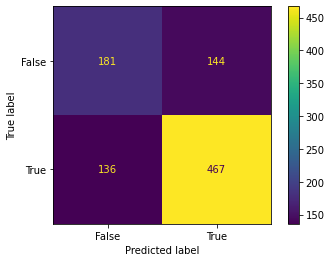

In [385]:
plot_confusion_matrix(dt_clf, X_test, y_test)

# GridSearchCV (Decision Tree)

In [386]:
params_dt = {
    'dt__max_depth':[1, 5, 10, 15, 20, 25, 30, 35],
    'dt__max_leaf_nodes':[1, 3, 5, 10, 20, 30, 40, 50],
    'dt__min_samples_leaf':[.01, .1, .5, .99, 1, 1.5, 1.9, 2]
}

Looking for the best parameters for our model

In [46]:
gs_dt = GridSearchCV(dt_clf, params_dt, cv=5, scoring='accuracy')

gs_dt.fit(X_train, y_train)

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trans',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['schedule_season',
                                                                          'score_home',
                                                                          'score_away',
                                                                          'spread_favorite',
                                                       

In [47]:
gs_dt.best_params_

{'dt__max_depth': 15, 'dt__max_leaf_nodes': 40, 'dt__min_samples_leaf': 1}

In [387]:
dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=15, max_leaf_nodes=40, min_samples_leaf=1))
])

In [388]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

Train Accuracy: 0.700371390918893
Test Accuracy: 0.6530172413793104


In [389]:
dt_pred = dt_clf.predict(X_test)

In [390]:
print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

Test Accuracy Score: 0.6530172413793104
-------------------
Test Precision Score: 0.691156462585034
-------------------
Test Recall Score: 0.8424543946932007
-------------------
Test F1_score: 0.7593423019431988
-------------------


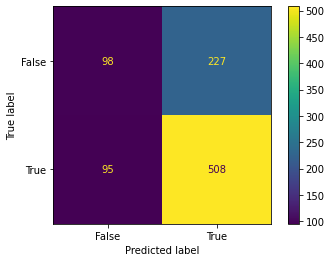

In [391]:
plot_confusion_matrix(dt_clf, X_test, y_test)

Our accuracy score got worse with the parameters, and false positive doesnt look to good, but were not overfitting.

---

# Adding Columns to DT

Created new varaibles to try and improve our model 

In [392]:
avg_spread_per_team = df.groupby('team_home').mean()['spread_favorite'].to_dict()

In [393]:
df['avg_spread_home'] = df['team_home'].map(avg_spread_per_team)

In [394]:
avg_weather_temp_stadium = df.groupby('stadium').mean()['weather_temperature'].to_dict()

In [395]:
df['avg_weather_temp_home'] = df['stadium'].map(avg_weather_temp_stadium)

In [396]:
avg_wind_per_stadium = df.groupby('stadium').mean()['weather_wind_mph'].to_dict()

In [397]:
df['avg_wind_home'] = df['stadium'].map(avg_wind_per_stadium)

In [398]:
avg_humi_per_stadium = df.groupby('stadium').mean()['weather_humidity'].to_dict()

In [399]:
df['avg_humi_stadium'] = df['stadium'].map(avg_humi_per_stadium)

In [400]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [401]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

In [402]:
num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [403]:
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity', 
                                    'over_under_line', 'avg_spread_home',
                                    'avg_weather_temp_home','avg_humi_stadium']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'stadium'])
])

In [404]:
dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])

In [405]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.7176724137931034


In [406]:
dt_pred = dt_clf.predict(X_test)

In [407]:
print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

Test Accuracy Score: 0.7176724137931034
-------------------
Test Precision Score: 0.7827529021558872
-------------------
Test Recall Score: 0.7827529021558872
-------------------
Test F1_score: 0.7827529021558872
-------------------


Accuracy score improve with the addition of variables, but overfitting like crazy

# GridSearchCV (Decision Tree)

In [408]:
params_dt = {
    'dt__max_depth':[1, 5, 10, 15, 20, 25, 30, 35],
    'dt__max_leaf_nodes':[1, 3, 5, 10, 20, 30, 40, 50],
    'dt__min_samples_leaf':[.01, .1, .5, .99, 1, 1.5, 1.9, 2]
}

In [409]:
gs_dt = GridSearchCV(dt_clf, params_dt, cv=5, scoring='accuracy')

gs_dt.fit(X_train, y_train)

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trans',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['schedule_season',
                                                                          'score_home',
                                                                          'score_away',
                                                                          'spread_favorite',
                                                       

In [410]:
gs_dt.best_params_

{'dt__max_depth': 20, 'dt__max_leaf_nodes': 50, 'dt__min_samples_leaf': 1}

In [411]:
dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=15, max_leaf_nodes=50, min_samples_leaf=1))
])

In [412]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

Train Accuracy: 0.7080388163412005
Test Accuracy: 0.6648706896551724


In [413]:
dt_pred = dt_clf.predict(X_test)

In [414]:
print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, dt_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, dt_pred)}')
print('-------------------')

Test Accuracy Score: 0.6648706896551724
-------------------
Test Precision Score: 0.6941489361702128
-------------------
Test Recall Score: 0.8656716417910447
-------------------
Test F1_score: 0.770479704797048
-------------------


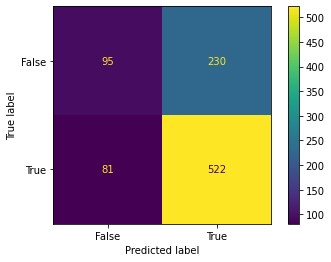

In [415]:
plot_confusion_matrix(dt_clf, X_test, y_test)

Accuracy score decreased, but were not overfitting anymore 

------

# XG Boost Model (Baseline Model)

In [416]:
import xgboost as xgb

In [417]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [418]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

In [419]:
num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [420]:
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'over_under_line']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'stadium'])
])

In [421]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier())
])

In [422]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

Train Accuracy: 0.954115250988379
Test Accuracy: 0.78125


In [423]:
xgb_pred = xgb_clf.predict(X_test)

In [424]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

Test Accuracy Score: 0.78125
-------------------
Test Precision Score: 0.7985074626865671
-------------------
Test Recall Score: 0.8872305140961857
-------------------
Test F1_score: 0.840534171249018
-------------------


Best accuracy score yet, but over fitting 

# GridSearchCV (Baseline)

In [425]:
params_xgb = {
    'xgb__max_depth':[10, 15, 20, 25, 30, 35],
    'xgb__learning_rate':[.001, .01, .1],
    'xgb__n_estimators':[10, 50, 100, 150]
}

In [426]:
gs_xgb = GridSearchCV(xgb_clf, params_xgb, cv=5, scoring='accuracy')

gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trans',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['schedule_season',
                                                                          'score_home',
                                                                          'score_away',
                                                                          'spread_favorite',
                                                       

Got our best parameters

In [427]:
gs_xgb.best_params_

{'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 150}

In [428]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', xgb.XGBClassifier(max_depth=10, learning_rate=.1, n_estimators=150, random_state=42))
])

In [429]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

Train Accuracy: 0.9883790583443153
Test Accuracy: 0.7974137931034483


In [430]:
xgb_pred = xgb_clf.predict(X_test)

In [431]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

Test Accuracy Score: 0.7974137931034483
-------------------
Test Precision Score: 0.8029197080291971
-------------------
Test Recall Score: 0.912106135986733
-------------------
Test F1_score: 0.8540372670807453
-------------------


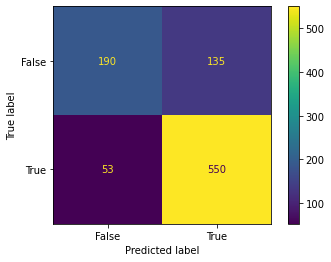

In [432]:
plot_confusion_matrix(xgb_clf, X_test, y_test)

Accuracy score got better, but overfitting got worse

----

# XG Boost (2 extra Variables)

In [433]:
X = df.drop(columns=['favorite_wins'])
y = df['favorite_wins']

# and train test split - to create our val holdout set!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [434]:
obj_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

In [435]:
num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [436]:
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_transformer, ['schedule_season', 'score_home', 'score_away', 'spread_favorite',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'over_under_line', 
                                    'avg_spread_home', 'avg_weather_temp_home']),
    ('obj_trans', obj_transformer, ['schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'stadium'])
])

In [437]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier())
])

In [438]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

Train Accuracy: 0.9566311249550736
Test Accuracy: 0.7618534482758621


In [439]:
xgb_pred = xgb_clf.predict(X_test)

In [440]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

Test Accuracy Score: 0.7618534482758621
-------------------
Test Precision Score: 0.7833827893175074
-------------------
Test Recall Score: 0.8756218905472637
-------------------
Test F1_score: 0.826938136256852
-------------------


Oveerfitting like crazy

In [441]:
params_xgb = {
    'xgb__scale_pos_weight':[1, 5, 8],
    'xgb__reg_alpha': [0.01, 0.05, .1, 0.5],
    'xgb__min_child_weight': [0.01, 0.05, .1, 0.5]
}

In [442]:
gs_xgb = GridSearchCV(xgb_clf, params_xgb, cv=5, scoring='accuracy')

gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trans',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['schedule_season',
                                                                          'score_home',
                                                                          'score_away',
                                                                          'spread_favorite',
                                                       

In [443]:
gs_xgb.best_params_

{'xgb__min_child_weight': 0.5,
 'xgb__reg_alpha': 0.5,
 'xgb__scale_pos_weight': 1}

In [444]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier(min_child_weight=0.5, reg_alpha=0.5, scale_pos_weight=1, random_state=42))
])

In [445]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

Train Accuracy: 0.9728046004552534
Test Accuracy: 0.802801724137931


In [446]:
xgb_pred = xgb_clf.predict(X_test)

In [447]:
print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Precision Score: {precision_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test Recall Score: {recall_score(y_test, xgb_pred)}')
print('-------------------')
print(f'Test F1_score: {f1_score(y_test, xgb_pred)}')
print('-------------------')

Test Accuracy Score: 0.802801724137931
-------------------
Test Precision Score: 0.8106508875739645
-------------------
Test Recall Score: 0.9087893864013267
-------------------
Test F1_score: 0.8569194683346364
-------------------


Best accuracy score out of all our models, overfitting but not too bad as other models

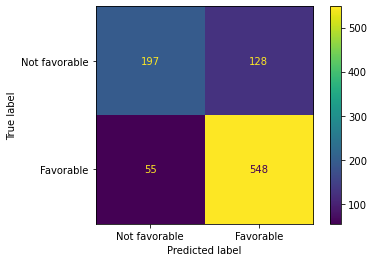

In [448]:
plot_confusion_matrix(xgb_clf, X_test, y_test, display_labels=['Not favorable', 'Favorable'])

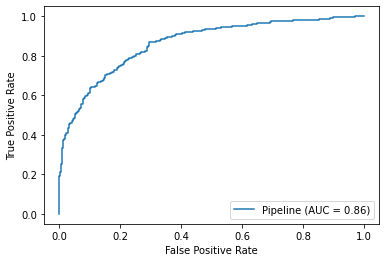

In [449]:
plot_roc_curve(xgb_clf, X_test, y_test)

In [459]:
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

In [460]:
xgb_pred_val = xgb_clf.predict(X_val)
accuracy_score(y_val, xgb_pred_val)

0.802801724137931